In [32]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sn
import xgboost as xgb
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## XGBoost for 3 Class Dataset

In [33]:
def xgb_classifier_012_train_evaluate(train_data_file_012, test_data_file_012):
    train_data = pd.read_csv(train_data_file_012)
    test_data = pd.read_csv(test_data_file_012)
    
    # Extracting the input and output features from the train and test data
    X_train = train_data.drop(['Diabetes_012'], axis=1)
    y_train = train_data['Diabetes_012']
    
    X_test = test_data.drop(['Diabetes_012'], axis=1)
    y_test = test_data['Diabetes_012']
    
    # Training the Model
    xgb_model = xgb.XGBClassifier( random_state=42,
                                  subsample =  0.17464383537522654, n_estimators = 751, max_depth = 8, learning_rate = 0.08705332861042284, gamma = 4.4607891960562736, colsample_bytree = 0.9740650745197952)

    xgb_model.fit(X_train, y_train)
    
    # Estimating the output
    y_pred = xgb_model.predict(X_test)
    
    return (y_test, y_pred)

In [34]:
train_data_file_012 = "Dataset/train_012.csv"
test_data_file_012 = "Dataset/test_012.csv"

y_test_xgb, y_pred_xgb = xgb_classifier_012_train_evaluate(train_data_file_012, test_data_file_012)

In [35]:
print(classification_report(y_test_xgb, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.55      0.20      0.29      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736



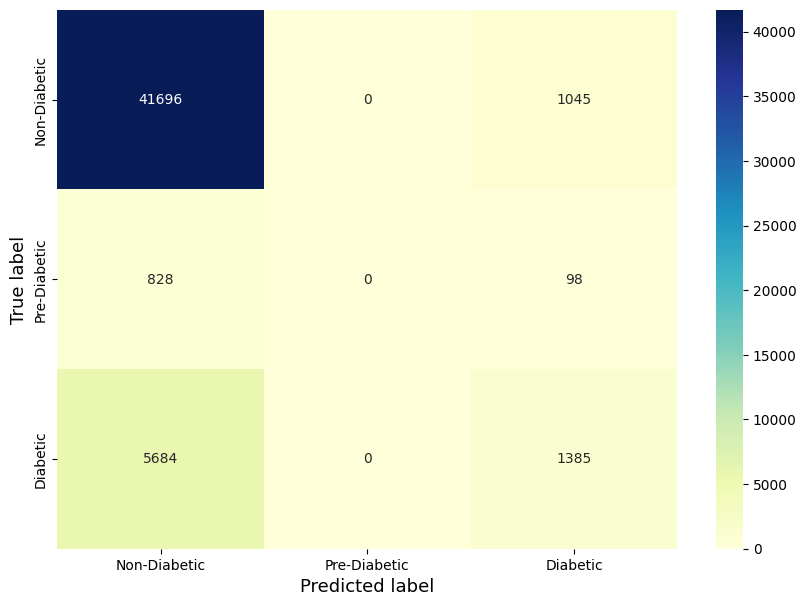

In [36]:
cm = confusion_matrix(y_test_xgb, y_pred_xgb)
cm_df = pd.DataFrame(cm, index = [i for i in ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']], columns = [i for i in ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']])
plt.figure(figsize = (10,7))
sn.heatmap(cm_df, cmap="YlGnBu", fmt='g', annot=True)
plt.xlabel('Predicted label',fontsize = 13)
plt.ylabel('True label',fontsize = 13)
plt.show()

## Feature Ranked

In [37]:
def xgb_classifier_ranked_features_012_train_evaluate(train_data_file_012, test_data_file_012):
    train_data = pd.read_csv(train_data_file_012)
    test_data = pd.read_csv(test_data_file_012)
    
    # Extracting the input and output features from the train and test data
    X_train = train_data.drop(['Diabetes_012'], axis=1)
    y_train = train_data['Diabetes_012']
    
    X_test = test_data.drop(['Diabetes_012'], axis=1)
    y_test = test_data['Diabetes_012']
    
    # Training the Model
    xgb_model = xgb.XGBClassifier( random_state=42,
                                  subsample =  0.17464383537522654, n_estimators = 751, max_depth = 8, learning_rate = 0.08705332861042284, gamma = 4.4607891960562736, colsample_bytree = 0.9740650745197952)

    xgb_model.fit(X_train, y_train)

    feature_importance = xgb_model.feature_importances_
    feature_importance_order = np.flip(np.argsort(feature_importance))
 
    X_train_ranked = X_train.to_numpy()[:,feature_importance_order[:5]]
    X_test_ranked = X_test.to_numpy()[:,feature_importance_order[:5]]

    xgb_model_ranked = xgb.XGBClassifier(random_state=42, 
                              subsample =  0.17464383537522654, n_estimators = 751, max_depth = 8, learning_rate = 0.08705332861042284, gamma = 4.4607891960562736, colsample_bytree = 0.9740650745197952)

    xgb_model_ranked.fit(X_train_ranked, y_train)

    y_pred = xgb_model_ranked.predict(X_test_ranked)
    
    return (y_test, y_pred)

In [38]:
train_data_file_012 = "Dataset/train_012.csv"
test_data_file_012 = "Dataset/test_012.csv"

y_test_xgb, y_pred_xgb_ranked = xgb_classifier_ranked_features_012_train_evaluate(train_data_file_012, test_data_file_012)

In [39]:
print(classification_report(y_test_xgb, y_pred_xgb_ranked))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.55      0.16      0.25      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736



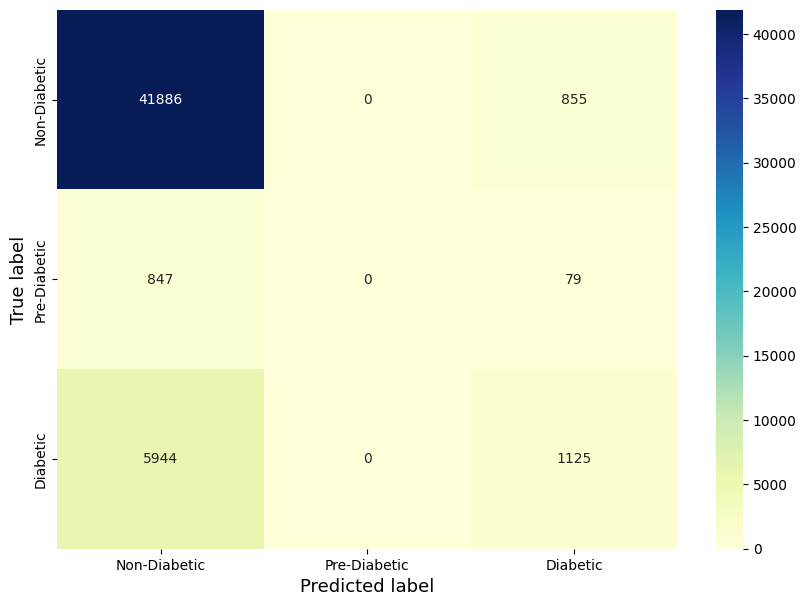

In [40]:
cm = confusion_matrix(y_test_xgb, y_pred_xgb_ranked)
cm_df = pd.DataFrame(cm, index = [i for i in ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']], columns = [i for i in ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']])
plt.figure(figsize = (10,7))
sn.heatmap(cm_df, cmap="YlGnBu", fmt='g', annot=True)
plt.xlabel('Predicted label',fontsize = 13)
plt.ylabel('True label',fontsize = 13)
plt.show()

# XGBoost for 2-Class Balanced Data

In [41]:
def xgb_classifer_binary_split_train_evaluate(train_data_file_binary_split, test_data_file_binary_split):
    train_data = pd.read_csv(train_data_file_binary_split)
    test_data = pd.read_csv(test_data_file_binary_split)
    
    # Extracting the input and output features from the train and test data
    X_train = train_data.drop(['Diabetes_binary'], axis=1)
    y_train = train_data['Diabetes_binary']
    
    X_test = test_data.drop(['Diabetes_binary'], axis=1)
    y_test = test_data['Diabetes_binary']
    
    # Training the Model
    xgb_model_binary_50_50 = xgb.XGBClassifier(random_state=42,
                                            subsample = 0.2757584755338077, n_estimators = 396, max_depth = 5, learning_rate = 0.036643581017826526, gamma = 4.75414396998711)
    xgb_model_binary_50_50.fit(X_train, y_train)
    
    # Estimating the output
    y_pred = xgb_model_binary_50_50.predict(X_test)
    
    # Calculating the fpr, tpr and roc_auc_score to draw the ROC curve
    fpr, tpr, _ = roc_curve(y_test, xgb_model_binary_50_50.predict_proba(X_test)[:,1])
    roc_auc_val = roc_auc_score(y_test, xgb_model_binary_50_50.predict_proba(X_test)[:,1])
    
    return (y_test, y_pred, fpr, tpr, roc_auc_val)

In [42]:
train_data_file_binary_split = "Dataset/train_binary_split.csv"
test_data_file_binary_split = "Dataset/test_binary_split.csv"

y_test, y_pred, fpr, tpr, roc_auc_val = xgb_classifer_binary_split_train_evaluate(train_data_file_binary_split, test_data_file_binary_split)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7070
         1.0       0.73      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



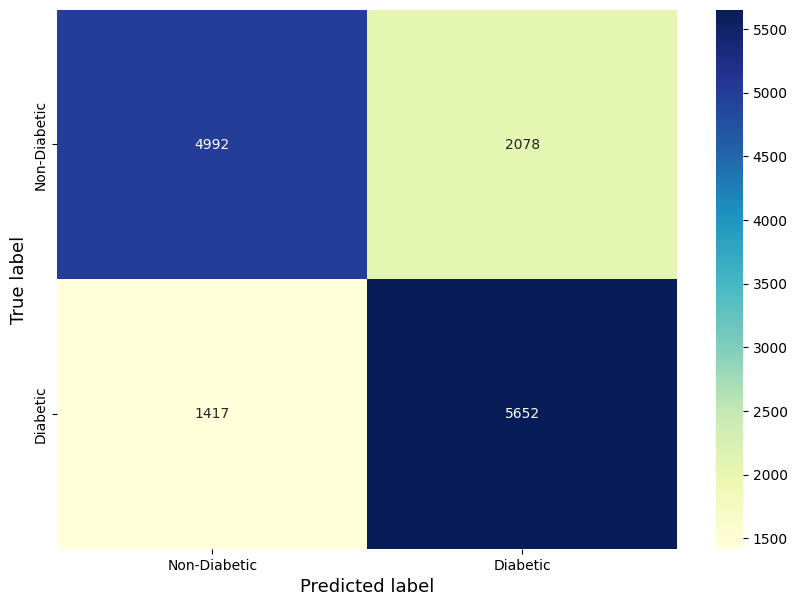

In [44]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = [i for i in ['Non-Diabetic', 'Diabetic']], columns = [i for i in ['Non-Diabetic', 'Diabetic']])
plt.figure(figsize = (10,7))
sn.heatmap(cm_df,  cmap="YlGnBu", fmt='g', annot=True)
plt.xlabel('Predicted label',fontsize = 13)
plt.ylabel('True label',fontsize = 13)
plt.show()

## Feature Ranked

In [45]:
def xgb_classifer_ranked_features_binary_split_train_evaluate(train_data_file_binary_split, test_data_file_binary_split):
    train_data = pd.read_csv(train_data_file_binary_split)
    test_data = pd.read_csv(test_data_file_binary_split)
    
    # Extracting the input and output features from the train and test data
    X_train = train_data.drop(['Diabetes_binary'], axis=1)
    y_train = train_data['Diabetes_binary']
    
    X_test = test_data.drop(['Diabetes_binary'], axis=1)
    y_test = test_data['Diabetes_binary']
    
    # Training the Model
    xgb_model_binary_50_50 = xgb.XGBClassifier(random_state=42,
                                            subsample = 0.2757584755338077, n_estimators = 396, max_depth = 5, learning_rate = 0.036643581017826526, gamma = 4.75414396998711)
    xgb_model_binary_50_50.fit(X_train, y_train)

    feature_importance = xgb_model_binary_50_50.feature_importances_
    feature_importance_order = np.flip(np.argsort(feature_importance))
 
    X_train_ranked = X_train.to_numpy()[:,feature_importance_order[:5]]
    X_test_ranked = X_test.to_numpy()[:,feature_importance_order[:5]]

    xgb_model_binary_50_50_ranked = xgb.XGBClassifier(random_state=42,
                                                      subsample = 0.2757584755338077, n_estimators = 396, max_depth = 5, learning_rate = 0.036643581017826526, gamma = 4.75414396998711)
    xgb_model_binary_50_50_ranked.fit(X_train_ranked, y_train)
    # Estimating the output
    y_pred = xgb_model_binary_50_50_ranked.predict(X_test_ranked)
    
    # Calculating the fpr, tpr and roc_auc_score to draw the ROC curve
    fpr, tpr, _ = roc_curve(y_test, xgb_model_binary_50_50_ranked.predict_proba(X_test_ranked)[:,1])
    roc_auc_val = roc_auc_score(y_test, xgb_model_binary_50_50_ranked.predict_proba(X_test_ranked)[:,1])
    
    return (y_test, y_pred, fpr, tpr, roc_auc_val)

In [46]:
train_data_file_binary_split = "Dataset/train_binary_split.csv"
test_data_file_binary_split = "Dataset/test_binary_split.csv"

y_test, y_pred_ranked, fpr_ranked, tpr_ranked, roc_auc_val_ranked = xgb_classifer_ranked_features_binary_split_train_evaluate(train_data_file_binary_split, test_data_file_binary_split)

In [47]:
print(classification_report(y_test, y_pred_ranked))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      7070
         1.0       0.72      0.79      0.76      7069

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139



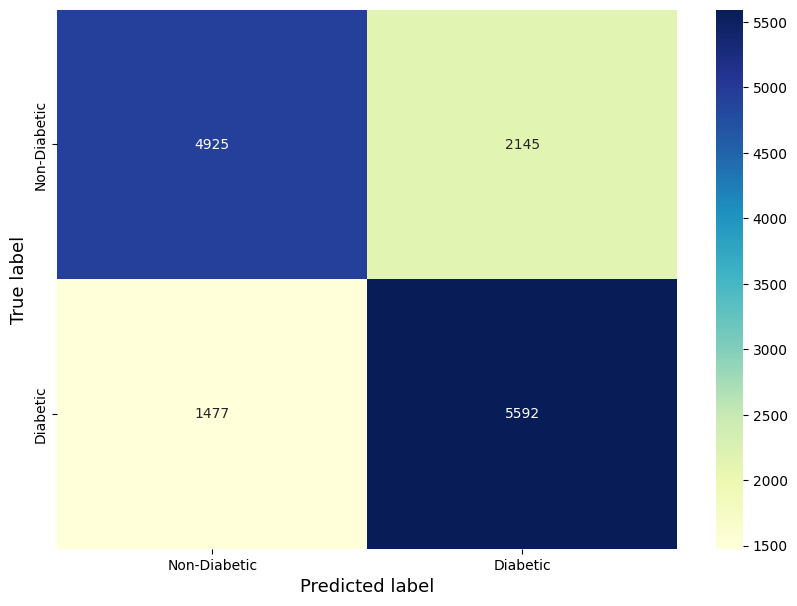

In [48]:
cm = confusion_matrix(y_test, y_pred_ranked)
cm_df = pd.DataFrame(cm, index = [i for i in ['Non-Diabetic', 'Diabetic']], columns = [i for i in ['Non-Diabetic', 'Diabetic']])
plt.figure(figsize = (10,7))
sn.heatmap(cm_df,  cmap="YlGnBu", fmt='g', annot=True)
plt.xlabel('Predicted label',fontsize = 13)
plt.ylabel('True label',fontsize = 13)
plt.show()

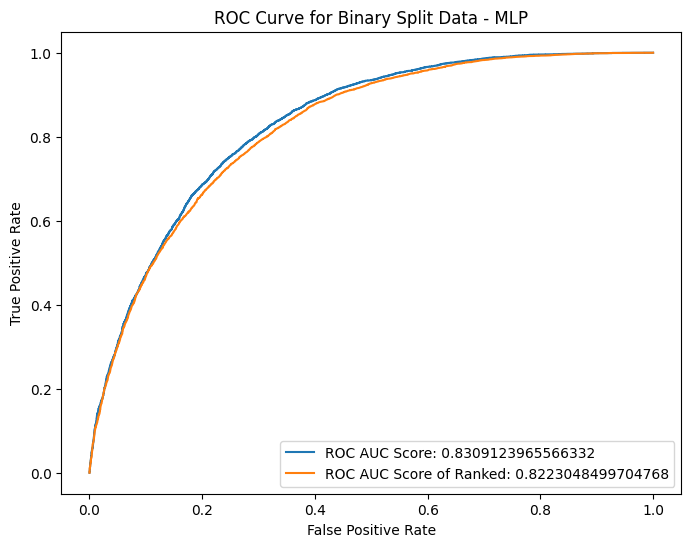

In [49]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC AUC Score: {roc_auc_val}")
plt.plot(fpr_ranked, tpr_ranked, label=f"ROC AUC Score of Ranked: {roc_auc_val_ranked}")
plt.title('ROC Curve for Binary Split Data - MLP')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()